# Bank Churn Prediction Proyect

## Introduction

En este proyecto vamos a analizar algunos datos del banco "Beta Bank" ya que los clientes se estan saliendo del banco poco a poco, asi que nuestro trabajo sera predecir si alguno de 
los clientes actuales dejara el banco pronto para asi poder tomar medidas y evitar que esto suceda. Crearemos un modelo con el maximo F1 posible.



## Objectives

Desarrollar un modelo predictivo eficiente que identifique con alta precisión a los clientes con mayor riesgo de abandonar los servicios de Beta Bank. Este modelo ayudará a la entidad bancaria a implementar estrategias proactivas para la retención de clientes, optimizando recursos y mejorando la satisfacción del cliente.

## Importacion de datos

In [139]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Carga de data sets

In [140]:
df = pd.read_csv('datasets/Churn.csv')

## Analisis y preparacion de datos

### Exploracion Inicial

In [141]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Características
- RowNumber: índice de cadena de datos
- CustomerId: identificador de cliente único
- Surname: apellido
- CreditScore: valor de crédito
- Geography: país de residencia
- Gender: sexo
- Age: edad
- Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- Balance: saldo de la cuenta
- NumOfProducts: número de productos bancarios utilizados por el cliente
- HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- IsActiveMember: actividad del cliente (1 - sí; 0 - no)
- EstimatedSalary: salario estimado

Objetivo
- Exited: El cliente se ha ido (1 - sí; 0 - no)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Podemos ver tenemos algunos datos nulos en Tenure, exactamente 909 los cuales representan un 9% de los datos, no es un porcentaje muy alto, pero si lo suficiente como para tener que tomar una decision sobre ellos ya que no podemos dejarlos asi, ya que podrian afectar a nuestro modelo. 

Tenemos varias opciones las cuales son las siguientes:

- Eliminarlos
- Rellenarlos con la media, mediana o moda
- Rellenarlos con un valor aleatorio

Decidimos eliminarlos ya que no es un porcentaje muy alto y no afectara mucho a nuestro modelo, y asi no tendremos que preocuparnos de ellos.

### Conversion a snake_case

In [143]:
import re

# Función para convertir PascalCase/CamelCase a snake_case
def to_snake_case(name):
    # Insertar un guión bajo entre palabras (mayúscula seguida de minúscula)
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    # Convertir cualquier mayúscula seguida de una mayúscula y una minúscula (para acrónimos) y manejar el final de la palabra
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Ejemplo de uso con un DataFrame de Pandas
df.columns = [to_snake_case(column) for column in df.columns]

### Eliminacion de datos nulos

In [144]:
df = df.dropna(subset=['tenure'])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        9091 non-null   int64  
 1   customer_id       9091 non-null   int64  
 2   surname           9091 non-null   object 
 3   credit_score      9091 non-null   int64  
 4   geography         9091 non-null   object 
 5   gender            9091 non-null   object 
 6   age               9091 non-null   int64  
 7   tenure            9091 non-null   float64
 8   balance           9091 non-null   float64
 9   num_of_products   9091 non-null   int64  
 10  has_cr_card       9091 non-null   int64  
 11  is_active_member  9091 non-null   int64  
 12  estimated_salary  9091 non-null   float64
 13  exited            9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


### Comprobacion de duplicados

In [146]:
print("Cantidad de duplicados =", df.duplicated().sum())


Cantidad de duplicados = 0


Eliminamos los datos nulos y comprobamos que ya no tenemos ninguno.

A demas verificamos si no tenemos valores duplicados, ya que podrian afectar a nuestro modelo.

### Eliminacion de columnas innecesarias

Ya que tenemos columnas que no van a ayudar a nuestro modelo, las vamos a eliminar, estas son RowNumber, Surname y CustomerId.

In [147]:
df = df.drop(columns=['surname'])
df = df.drop(columns=['row_number'])
df = df.drop(columns=['customer_id'])



### Analisis Grafico de datos

Para comprender mejor los datos, vamos a realizar un analisis grafico de los mismos.

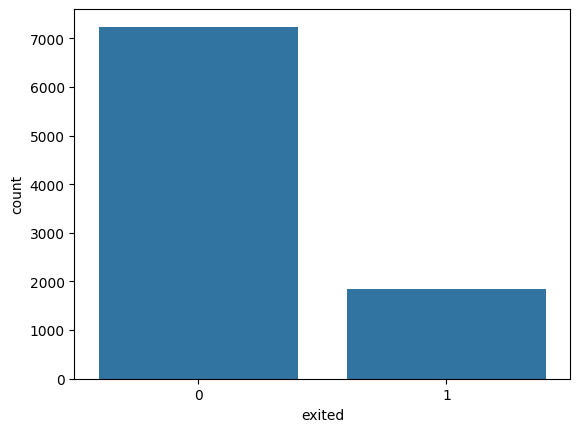

In [148]:
# Graficamos la distribución de la variable objetivo

sns.countplot(x='exited', data=df)
plt.show()

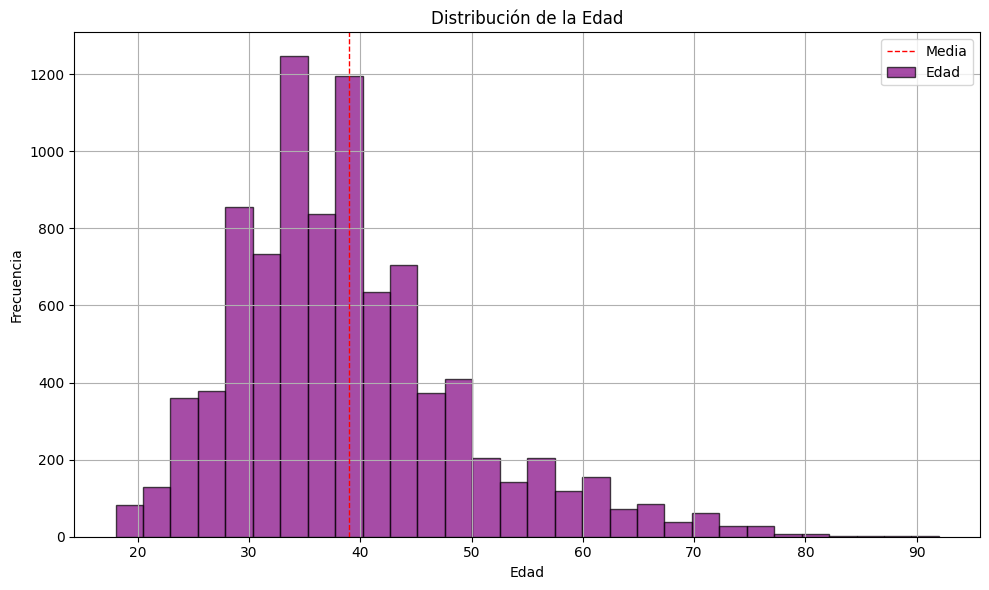

In [149]:

# Graficamos la edad de los clientes

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)  # Añadir una cuadrícula para facilitar la lectura
plt.axvline(df['age'].mean(), color='red', linestyle='dashed', linewidth=1)  # Línea vertical para la media
plt.legend(['Media', 'Edad'])  # Actualizar la leyenda para incluir la media
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()

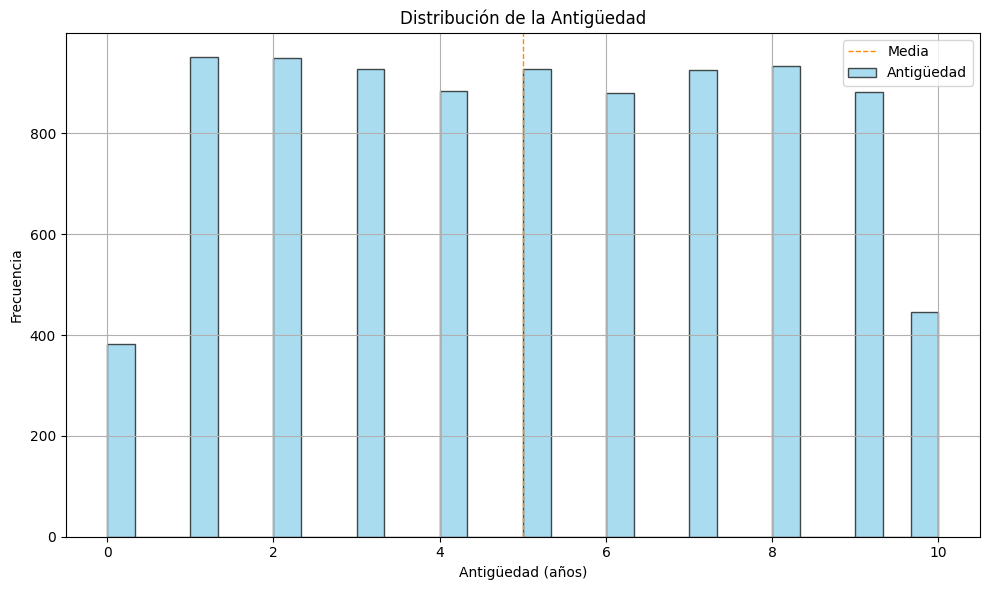

In [150]:
# Graficamos la distribución de la antigüedad de los clientes

plt.figure(figsize=(10, 6))
plt.hist(df['tenure'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de la Antigüedad')
plt.xlabel('Antigüedad (años)')
plt.ylabel('Frecuencia')
plt.grid(True)  # Añadir una cuadrícula para facilitar la lectura
plt.axvline(df['tenure'].mean(), color='darkorange', linestyle='dashed', linewidth=1)  # Línea vertical para la media
plt.legend(['Media', 'Antigüedad'])  # Actualizar la leyenda para incluir la media
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()

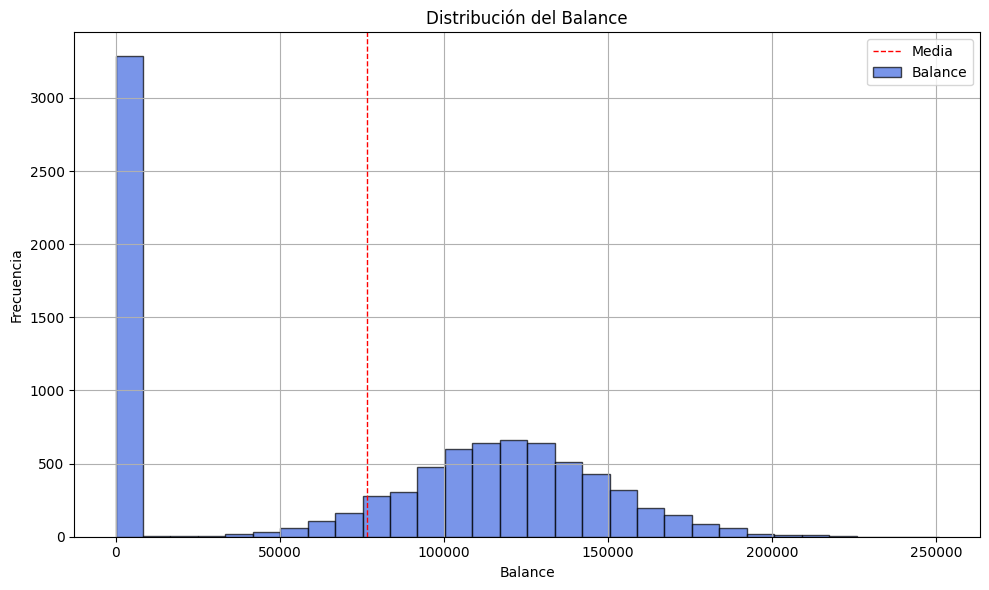

In [151]:
# Graficamos la distribución del balance de los clientes

plt.figure(figsize=(10, 6))
plt.hist(df['balance'], bins=30, alpha=0.7, color='royalblue', edgecolor='black')
plt.title('Distribución del Balance')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.grid(True)  # Añadir una cuadrícula para facilitar la lectura
plt.axvline(df['balance'].mean(), color='red', linestyle='dashed', linewidth=1)  # Línea vertical para la media
plt.legend(['Media', 'Balance'])  # Actualizar la leyenda para incluir la media
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()



Podemos ver que en esta grafica como un gran numero de clientes tienen un balance de 0 en sus cuentas, esto puede ser debido a que son clientes nuevos y no han tenido tiempo de acumular dinero en sus cuentas, o que simplemente dejaron de utilizar el banco y dejaron sus cuentas en 0 o que simplemente no tienen dinero en sus cuentas.

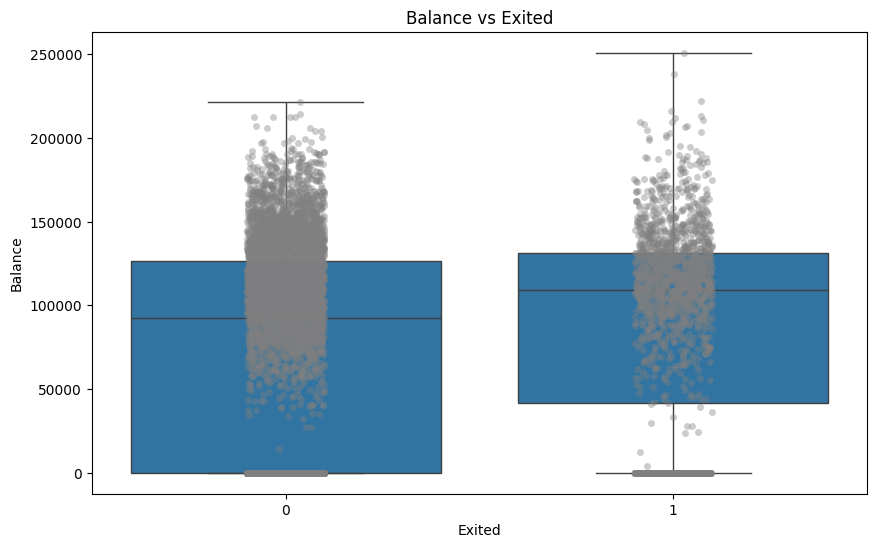

In [152]:
# Graficamos la distribucion del balance con respecto a la variable objetivo

plt.figure(figsize=(10, 6))
sns.boxplot(x='exited', y='balance', data=df, showfliers=True, flierprops=dict(marker='o', markersize=5, linestyle='none', markeredgecolor='gray'))
sns.stripplot(x='exited', y='balance', data=df, color='grey', alpha=0.4, jitter=True)
plt.title('Balance vs Exited')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show()

Con esta grafica podemos ver que muchos de los que no se han ido del banco tiene un balance cercano a 0, mientras que los que se han ido tienen un balance mas alto, esto podria significar que muchos que tienen una cuenta con poco dinero no podrian estar utilizando el banco y podrian ser algun tipo de ruido en los datos ya que realmente no estan utilizando el mismo.

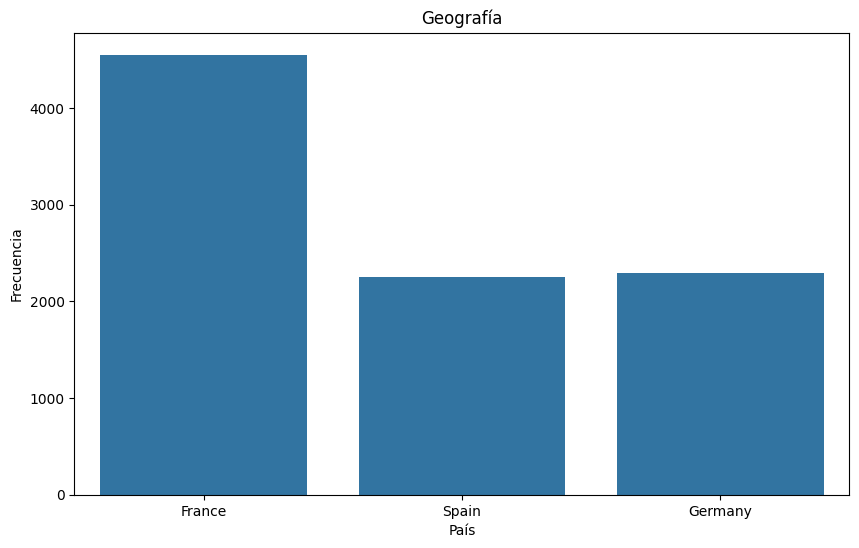

In [153]:
# Graficaremos la distribucion geografica de los clientes

plt.figure(figsize=(10, 6))
sns.countplot(x='geography', data=df)
plt.title('Geografía')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.show()

## Categorizacion de datos

Ya que tenemos datos categoricos, tenemos que convertirlos a numericos para que nuestro modelo pueda trabajar con ellos. Especificamente Gender y Geography.

In [154]:
df = pd.get_dummies(df, columns=['geography', 'gender'])
df.head(5)


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [155]:
df.columns = df.columns.str.lower()
df.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_france,geography_germany,geography_spain,gender_female,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,False,False,True,True,False


## Division del conjunto de Datos

En este paso vamos a dividir nuestro conjunto de datos en 3 partes, train, validacion y test. Para poder entrenar nuestro modelo, validar que funciona correctamente y por ultimo testearlo.

In [156]:
df_train, df_temp = train_test_split(df, test_size=0.2, random_state=12345)
df_val, df_test = train_test_split(df_temp, test_size=0.25, random_state=12345)


## Escalado de Caracteristicas

Dado que algunas de nuestras columnas tienen valores muy altos y otras muy bajos, tenemos que escalarlas para que nuestro modelo pueda trabajar con ellas correctamente. Entre ellas tenemos CreditScore, Age, Tenure, Balance y EstimatedSalary.

In [157]:
scaler = StandardScaler()
num_columns = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler.fit(df_train[num_columns])


df_train[num_columns] = scaler.transform(df_train[num_columns])
df_val[num_columns] = scaler.transform(df_val[num_columns])
df_test[num_columns] = scaler.transform(df_test[num_columns])

## Verificacion del equilibrio de clases

In [158]:
class_distribution = df_train['exited'].value_counts(normalize=True)
print(class_distribution)


exited
0    0.795792
1    0.204208
Name: proportion, dtype: float64


Podemos ver que tenemos un desequilibrio de clases, ya que tenemos un 80% de clientes que no se han ido y un 20% que si se han ido. Esto puede afectar a nuestro modelo, ya que podria aprender a predecir que todos los clientes no se van a ir y tendriamos un modelo que no nos serviria para nada.

Para este proyecto vamos a entrenar a nuestros modelos con los datos desbalanceados y balanceadors (oversampling y undersampling) para ver cual de ellos nos da mejores resultados.


### Sobre muestreo (oversampling)

In [159]:
# Dividir el conjunto de entrenamiento en características y variable objetivo
x_train_over = df_train.drop('exited', axis=1)
y_train_over = df_train['exited']

# Sobremuestreo de la clase minoritaria
minority_class = df_train[df_train['exited'] == 1] # Obtener la clase minoritaria
oversampled_minority_class = pd.concat([minority_class] * 3, ignore_index=True) # Repetir la clase minoritaria 3 veces para obtener una clase minoritaria sobremuestrada
oversampled_minority_class = shuffle(oversampled_minority_class, random_state=12345) # Mezclar la clase minoritaria sobremuestrada

# Combinar la clase minoritaria sobremuestrada con la clase mayoritaria para obtener x_train_over_sampled
x_train_over_sampled = pd.concat([x_train_over, oversampled_minority_class.drop('exited', axis=1)], ignore_index=True) # Eliminar la columna 'exited' de la clase minoritaria sobremuestrada
y_train_over_sampled = pd.concat([y_train_over, oversampled_minority_class['exited']], ignore_index=True) # Obtener la columna 'exited' de la clase minoritaria sobremuestrada

### Sub muestreo (undersampling)

In [160]:
# Dividir el conjunto de entrenamiento en características y variable objetivo
x_train_under = df_train.drop('exited', axis=1)
y_train_under = df_train['exited']

# Tamaño de la clase minoritaria
size_minority_class = len(df_train[df_train['exited'] == 1])

# DataFrame de la clase mayoritaria
majority_class_df = df_train[df_train['exited'] == 0]

# Submuestreo de la clase mayoritaria para igualar el tamaño de la clase minoritaria
undersampled_majority_class = majority_class_df.sample(n=size_minority_class, random_state=12345)
undersampled_majority_class = shuffle(undersampled_majority_class, random_state=12345)

# DataFrame de la clase minoritaria
minority_class_df = df_train[df_train['exited'] == 1]

# Combinar la clase mayoritaria submuestreada con la clase minoritaria
x_train_under_sampled = pd.concat([minority_class_df.drop('exited', axis=1), undersampled_majority_class.drop('exited', axis=1)], ignore_index=True)
y_train_under_sampled = pd.concat([minority_class_df['exited'], undersampled_majority_class['exited']], ignore_index=True)

### Verificacion de Balanceos de clases

In [161]:
# Para el conjunto original
# Dividir el conjunto sin balancear en características y variable objetivo
x_train = df_train.drop('exited', axis=1)
y_train = df_train['exited']
balance_original = y_train.value_counts()
print('Balance original:\n', balance_original)

# Para el conjunto sobremuestreado
balance_oversampled = y_train_over_sampled.value_counts()
print('\nBalance sobremuestreado:\n', balance_oversampled)

# Para el conjunto submuestreado
balance_undersampled = y_train_under_sampled.value_counts()
print('\nBalance submuestreado:\n', balance_undersampled)

Balance original:
 exited
0    5787
1    1485
Name: count, dtype: int64

Balance sobremuestreado:
 exited
1    5940
0    5787
Name: count, dtype: int64

Balance submuestreado:
 exited
1    1485
0    1485
Name: count, dtype: int64


Podemos ver que ahora tenemos un 3 diferentes conjuntos de datos, uno con los datos originales, otro con los datos balanceados con oversampling y otro con los datos balanceados con undersampling.

## Seleccion de Modelos y Entrenamiento

### Seleccion Inicial de Modelos

Para esta parte nos vamos a decidir por 3 modelos, los cuales son los siguientes:

- LogisticRegression
- DecisionTreeClassifier
- RandomForestClassifier

#### Variables para entrenamiento

#### Sin balanceo
- x_train
- y_train

#### Oversampling
- x_train_oversampling
- y_train_oversampling

#### Undersampling
- x_train_undersampling
- y_train_undersampling

### Logistic Regression

#### Sin balanceo

##### Busqueda de mejores parametros

In [162]:
C_values = [0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']

best_model = None
best_result = 0
best_C = None
best_penalty = None

for C in C_values:
    for penalty in penalties:
        # Intentar entrenar el modelo con los hiperparámetros actuales
        try:
            model = LogisticRegression(C=C, penalty=penalty, solver='liblinear', random_state=12345)
            model.fit(x_train, y_train)
            y_pred = model.predict(df_val.drop('exited', axis=1))
            result = f1_score(df_val['exited'], y_pred)

            # Actualizar los mejores hiperparámetros si el resultado es mejor
            if result > best_result:
                best_model = model
                best_result = result
                best_C = C
                best_penalty = penalty

        except Exception as e:
            print(f"No se pudo entrenar el modelo con C = {C} y penalty = {penalty}: {e}")

print(f"Mejor F1 Score: {best_result}, Mejor C: {best_C}, Mejor Penalty: {best_penalty}")

Mejor F1 Score: 0.3513513513513513, Mejor C: 1, Mejor Penalty: l2


In [163]:
# Seleccionar el modelo
model_no_balance = LogisticRegression(C=1, penalty="l2", random_state=12345, solver='liblinear')

# Entrenar el modelo
model_no_balance.fit(x_train, y_train)

# Predecir la variable objetivo para el conjunto de validación
y_pred_no_balance = model_no_balance.predict(df_val.drop('exited', axis=1))

In [164]:
# Calcular la precisión
accuracy_no_balance_log = accuracy_score(df_val['exited'], y_pred_no_balance)

# Calcular el recall
recall_no_balance_log = recall_score(df_val['exited'], y_pred_no_balance)

# Calcular el F1-score
f1_no_balance_log = f1_score(df_val['exited'], y_pred_no_balance)

# Calcular el ROC AUC
roc_auc_no_balance_log = roc_auc_score(df_val['exited'], y_pred_no_balance)

print(f"Accuracy: {accuracy_no_balance_log}")
print(f"Recall: {recall_no_balance_log}")
print(f"ROC AUC: {roc_auc_no_balance_log}")
print(f"F1 Score: {f1_no_balance_log}")

Accuracy: 0.8240469208211144
Recall: 0.23722627737226276
ROC AUC: 0.6043929551998928
F1 Score: 0.3513513513513513


Podemos ver que el modelo de regresion logistica sin balancear nos da un F1 de 0.3515, lo cual no es muy bueno, pero es un buen punto de partida.

#### Sobremuestreo (oversampling)

##### Busqueda de mejores parametros

In [165]:
C_values = [0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']

best_model = None
best_result = 0
best_C = None
best_penalty = None

for C in C_values:
    for penalty in penalties:
        # Intentar entrenar el modelo con los hiperparámetros actuales
        try:
            model = LogisticRegression(C=C, penalty=penalty, solver='liblinear', random_state=12345)
            model.fit(x_train_over_sampled, y_train_over_sampled)
            y_pred = model.predict(df_val.drop('exited', axis=1))
            result = f1_score(df_val['exited'], y_pred)

            # Actualizar los mejores hiperparámetros si el resultado es mejor
            if result > best_result:
                best_model = model
                best_result = result
                best_C = C
                best_penalty = penalty

        except Exception as e:
            print(f"No se pudo entrenar el modelo con C = {C} y penalty = {penalty}: {e}")

print(f"Mejor F1 Score: {best_result}, Mejor C: {best_C}, Mejor Penalty: {best_penalty}")

Mejor F1 Score: 0.49937578027465673, Mejor C: 0.1, Mejor Penalty: l2


In [166]:
# Seleccionar el modelo con el conjunto sobremuestreado
model_over = LogisticRegression(C= 0.1, penalty="l2", random_state=12345, solver='liblinear')

# Entrenar el modelo con el conjunto sobremuestreado
model_over.fit(x_train_over_sampled, y_train_over_sampled)

# Predecir la variable objetivo para el conjunto de validación con el conjunto sobremuestreado
y_pred_over_log = model_over.predict(df_val.drop('exited', axis=1))

In [167]:
# Calcular la precisión con el conjunto sobremuestreado
accuracy_over_log = accuracy_score(df_val['exited'], y_pred_over_log)

# Calcular el recall con el conjunto sobremuestreado
recall_over_log = recall_score(df_val['exited'], y_pred_over_log)

# Calcular el F1-score con el conjunto sobremuestreado
f1_over_log = f1_score(df_val['exited'], y_pred_over_log)

# Calcular el ROC AUC con el conjunto sobremuestreado
roc_auc_over_log = roc_auc_score(df_val['exited'], y_pred_over_log)

print(f"Accuracy: {accuracy_over_log}")
print(f"Recall: {recall_over_log}")
print(f"ROC AUC: {roc_auc_over_log}")
print(f"F1 Score: {f1_over_log}")

Accuracy: 0.7060117302052786
Recall: 0.7299270072992701
ROC AUC: 0.714963503649635
F1 Score: 0.49937578027465673


Haciendo el mismo proceso pero con los datos balanceados con oversampling, podemos ver que el F1 ha subido a 0.4993, lo cual es un buen resultado.

#### Submuestreo (undersampling)

##### Busqueda de mejores parametros

In [168]:
C_values = [0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']

best_model = None
best_result = 0
best_C = None
best_penalty = None

for C in C_values:
    for penalty in penalties:
        # Intentar entrenar el modelo con los hiperparámetros actuales
        try:
            model = LogisticRegression(C=C, penalty=penalty, solver='liblinear', random_state=12345)
            model.fit(x_train_under_sampled, y_train_under_sampled)
            y_pred = model.predict(df_val.drop('exited', axis=1))
            result = f1_score(df_val['exited'], y_pred)

            # Actualizar los mejores hiperparámetros si el resultado es mejor
            if result > best_result:
                best_model = model
                best_result = result
                best_C = C
                best_penalty = penalty

        except Exception as e:
            print(f"No se pudo entrenar el modelo con C = {C} y penalty = {penalty}: {e}")

print(f"Mejor F1 Score: {best_result}, Mejor C: {best_C}, Mejor Penalty: {best_penalty}")

Mejor F1 Score: 0.5, Mejor C: 0.01, Mejor Penalty: l2


In [169]:
# Seleccionar el modelo con el conjunto submuestreado
model_under_log = LogisticRegression(C=0.01, penalty="l2", random_state=12345, solver='liblinear')

# Entrenar el modelo con el conjunto submuestreado
model_under_log.fit(x_train_under_sampled, y_train_under_sampled)

# Predecir la variable objetivo para el conjunto de validación con el conjunto submuestreado
y_pred_under_log = model_under_log.predict(df_val.drop('exited', axis=1))

In [170]:
# Calcular la precisión con el conjunto submuestreado
accuracy_under_log = accuracy_score(df_val['exited'], y_pred_under_log)

# Calcular el recall con el conjunto submuestreado
recall_under_log = recall_score(df_val['exited'], y_pred_under_log)

# Calcular el F1-score con el conjunto submuestreado
f1_under_log = f1_score(df_val['exited'], y_pred_under_log)

# Calcular el ROC AUC con el conjunto submuestreado
roc_auc_under_log = roc_auc_score(df_val['exited'], y_pred_under_log)

print(f"Accuracy: {accuracy_under_log}")
print(f"Recall: {recall_under_log}")
print(f"ROC AUC: {roc_auc_under_log}")
print(f"F1 Score: {f1_under_log}")

Accuracy: 0.7111436950146628
Recall: 0.718978102189781
ROC AUC: 0.7140762070581933
F1 Score: 0.5


Utilizando los datos balanceados con undersampling, podemos ver que el F1 ha subido a 0.5 lo cual es un buen resultado. Siendo este el mejor resultado de los 3 modelos.

### Decision Tree Classifier

#### Sin balanceo

##### Busqueda de mejores parametros

In [171]:
best_model = None
best_result = 0
best_depth = None
best_min_samples_split = None
best_min_samples_leaf = None

for depth in range(1, 11):
    for min_samples_split in range(2, 11):
        for min_samples_leaf in range(1, 6):
            model = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=12345)
            model.fit(x_train, y_train)
            predictions_valid = model.predict(df_val.drop('exited', axis=1))
            result = f1_score(df_val['exited'], predictions_valid)

            if result > best_result:
                best_model = model
                best_result = result
                best_depth = depth
                best_min_samples_split = min_samples_split
                best_min_samples_leaf = min_samples_leaf

print(f"Mejor F1: {best_result}, Mejor max_depth: {best_depth}, Mejor min_samples_split: {best_min_samples_split}, Mejor min_samples_leaf: {best_min_samples_leaf}")

Mejor F1: 0.5870020964360587, Mejor max_depth: 7, Mejor min_samples_split: 2, Mejor min_samples_leaf: 5


In [172]:
# Seleccionar modelo
decision_tree_model_no_balance = DecisionTreeClassifier(max_depth=7, min_samples_split=2, min_samples_leaf=5, random_state=12345)

# Entrenar modelo
decision_tree_model_no_balance.fit(x_train, y_train)

# Predecir la variable objetivo para el conjunto de validación
y_pred_no_balance_tree = decision_tree_model_no_balance.predict(df_val.drop('exited', axis=1))

In [173]:
# Calcular la precisión
accuracy_no_balance_tree = accuracy_score(df_val['exited'], y_pred_no_balance_tree)

# Calcular el recall
recall_no_balance_tree = recall_score(df_val['exited'], y_pred_no_balance_tree)

# Calcular el F1-score
f1_no_balance_tree = f1_score(df_val['exited'], y_pred_no_balance_tree)

# Calcular el ROC AUC
roc_auc_no_balance_tree = roc_auc_score(df_val['exited'], y_pred_no_balance_tree)

print(f"Accuracy: {accuracy_no_balance_tree}")
print(f"Recall: {recall_no_balance_tree}")
print(f"ROC AUC: {roc_auc_no_balance_tree}")
print(f"F1 Score: {f1_no_balance_tree}")

Accuracy: 0.8555718475073314
Recall: 0.5109489051094891
ROC AUC: 0.7265753699859372
F1 Score: 0.5870020964360587


Podemos ver que el modelo de arbol de decision con los datos sin balancear nos da un F1 de 0.5870, lo cual esta bastante bien teniendo en cuenta que no hemos hecho ningun tipo de balanceo.

#### Sobremuestreo (oversampling)

##### Busqueda de mejores parametros

In [174]:
best_model = None
best_result = 0
best_depth = None
best_min_samples_split = None
best_min_samples_leaf = None

for depth in range(1, 11):
    for min_samples_split in range(2, 11):
        for min_samples_leaf in range(1, 6):
            model = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=12345)
            model.fit(x_train_over_sampled, y_train_over_sampled)
            predictions_valid = model.predict(df_val.drop('exited', axis=1))
            result = f1_score(df_val['exited'], predictions_valid)

            if result > best_result:
                best_model = model
                best_result = result
                best_depth = depth
                best_min_samples_split = min_samples_split
                best_min_samples_leaf = min_samples_leaf

print(f"Mejor F1: {best_result}, Mejor max_depth: {best_depth}, Mejor min_samples_split: {best_min_samples_split}, Mejor min_samples_leaf: {best_min_samples_leaf}")

Mejor F1: 0.5534246575342465, Mejor max_depth: 5, Mejor min_samples_split: 2, Mejor min_samples_leaf: 4


In [175]:
# Seleccionar el modelo con el conjunto sobremuestreado
decision_tree_model_over = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=4, random_state=12345)

# Entrenar el modelo con el conjunto sobremuestreado
decision_tree_model_over.fit(x_train_over_sampled, y_train_over_sampled)

# Predecir la variable objetivo para el conjunto de validación con el conjunto sobremuestreado
y_pred_over_tree = decision_tree_model_over.predict(df_val.drop('exited', axis=1))

In [176]:
# Calcular la precisión
accuracy_over_tree = accuracy_score(df_val['exited'], y_pred_over_tree)

# Calcular el recall
recall_over_tree = recall_score(df_val['exited'], y_pred_over_tree)

# Calcular el F1-score
f1_over_tree = f1_score(df_val['exited'], y_pred_over_tree)

# Calcular el ROC AUC
roc_auc_over_tree = roc_auc_score(df_val['exited'], y_pred_over_tree)

print(f"Accuracy: {accuracy_over_tree}")
print(f"Recall: {recall_over_tree}")
print(f"ROC AUC: {roc_auc_over_tree}")
print(f"F1 Score: {f1_over_tree}")

Accuracy: 0.7609970674486803
Recall: 0.7372262773722628
ROC AUC: 0.7520993772182414
F1 Score: 0.5534246575342465


Nuestro modelo de arbol de decision con los datos balanceados con oversampling nos da un F1 de 0.5534, y nos da un menor F1 que el modelo sin balancear. Por lo que podemos ver que el balanceo no ha ayudado a nuestro modelo en este caso.

#### Submuestreo (undersampling)

##### Busqueda de mejores parametros

In [177]:
best_model = None
best_result = 0
best_depth = None
best_min_samples_split = None
best_min_samples_leaf = None

for depth in range(1, 11):
    for min_samples_split in range(2, 11):
        for min_samples_leaf in range(1, 6):
            model = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=12345)
            model.fit(x_train_under_sampled, y_train_under_sampled)
            predictions_valid = model.predict(df_val.drop('exited', axis=1))
            result = f1_score(df_val['exited'], predictions_valid)

            if result > best_result:
                best_model = model
                best_result = result
                best_depth = depth
                best_min_samples_split = min_samples_split
                best_min_samples_leaf = min_samples_leaf

print(f"Mejor F1: {best_result}, Mejor max_depth: {best_depth}, Mejor min_samples_split: {best_min_samples_split}, Mejor min_samples_leaf: {best_min_samples_leaf}")

Mejor F1: 0.5706447187928669, Mejor max_depth: 6, Mejor min_samples_split: 2, Mejor min_samples_leaf: 2


In [178]:
# Seleccionar el modelo con el conjunto submuestreado
decision_tree_model_under = DecisionTreeClassifier(max_depth=6, min_samples_split=2, min_samples_leaf=2, random_state=12345)

# Entrenar el modelo con el conjunto submuestreado
decision_tree_model_under.fit(x_train_under_sampled, y_train_under_sampled)

# Predecir la variable objetivo para el conjunto de validación con el conjunto submuestreado
y_pred_under_tree = decision_tree_model_under.predict(df_val.drop('exited', axis=1))

In [179]:
# Calcular la precisión
accuracy_under_tree = accuracy_score(df_val['exited'], y_pred_under_tree)

# Calcular el recall
recall_under_tree = recall_score(df_val['exited'], y_pred_under_tree)

# Calcular el F1-score
f1_under_tree = f1_score(df_val['exited'], y_pred_under_tree)

# Calcular el ROC AUC
roc_auc_under_tree = roc_auc_score(df_val['exited'], y_pred_under_tree)

print(f"Accuracy: {accuracy_under_tree}")
print(f"Recall: {recall_under_tree}")
print(f"ROC AUC: {roc_auc_under_tree}")
print(f"F1 Score: {f1_under_tree}")


Accuracy: 0.7705278592375366
Recall: 0.7591240875912408
ROC AUC: 0.7662592915020424
F1 Score: 0.5706447187928669


Utilizando el metodo de under sampling, podemos ver que el F1 es de 0.5706, lo cual es un buen resultado, pero no es mejor que el modelo sin balancear ya que tiene un F1 de 0.5870. Por lo tanto podemos ver que el balanceo no ha ayudado a nuestro modelo en este caso y lo mejor es utilizar los datos sin balancear por el momento

### Random Forest Classifier

#### Sin balanceo

##### Busqueda de mejores parametros

In [180]:
best_model = None
best_result = 0  
best_n_estimators = 0
best_max_depth = 0

# Iterar sobre un rango de valores para n_estimators y max_depth
for n_estimators in range(10, 101, 10):
    for max_depth in range(1, 11):
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
        model.fit(x_train, y_train) # Datos sin balancear
        predictions_valid = model.predict(df_val.drop('exited', axis=1)) 
        result = f1_score(df_val['exited'], predictions_valid)

        # Actualizar el mejor modelo si el F1 score actual es mejor que el mejor encontrado hasta ahora
        if result > best_result:
            best_model = model
            best_result = result
            best_n_estimators = n_estimators
            best_max_depth = max_depth

print("Mejor F1 Score en el conjunto de validación: %f, n_estimators: %d, max_depth: %d" % (best_result, best_n_estimators, best_max_depth))

Mejor F1 Score en el conjunto de validación: 0.574766, n_estimators: 40, max_depth: 9


In [181]:
# Seleccionar modelo
random_forest_model_no_balance = RandomForestClassifier(n_estimators=40, max_depth=9, random_state=12345)

# Entrenar modelo
random_forest_model_no_balance.fit(x_train, y_train)

# Predecir la variable objetivo para el conjunto de validación
y_pred_no_balance_forest = random_forest_model_no_balance.predict(df_val.drop('exited', axis=1))



In [182]:
# Calcular la precisión
accuracy_no_balance_forest = accuracy_score(df_val['exited'], y_pred_no_balance_forest)

# Calcular el recall
recall_no_balance_forest = recall_score(df_val['exited'], y_pred_no_balance_forest)

# Calcular el F1-score
f1_no_balance_forest = f1_score(df_val['exited'], y_pred_no_balance_forest)

# Calcular el ROC AUC
roc_auc_no_balance_forest = roc_auc_score(df_val['exited'], y_pred_no_balance_forest)

print(f"Accuracy: {accuracy_no_balance_forest}")
print(f"Recall: {recall_no_balance_forest}")
print(f"ROC AUC: {roc_auc_no_balance_forest}")
print(f"F1 Score: {f1_no_balance_forest}")


Accuracy: 0.8665689149560117
Recall: 0.4489051094890511
ROC AUC: 0.710232371258287
F1 Score: 0.5747663551401869


Como podemos ver el modelo de random forest nos da un F1 de 0.5747, con los datos sin balancear, ahora vamos a ver si el balanceo nos ayuda a mejorar este modelo

#### Sobremuestreo (oversampling)

##### Busqueda de mejores parametros

In [183]:
best_model = None
best_result = 0  
best_n_estimators = 0
best_max_depth = 0

# Iterar sobre un rango de valores para n_estimators y max_depth
for n_estimators in range(10, 101, 10):
    for max_depth in range(1, 11):
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
        model.fit(x_train_over_sampled, y_train_over_sampled) # Datos sobremuestreados
        predictions_valid = model.predict(df_val.drop('exited', axis=1)) 
        result = f1_score(df_val['exited'], predictions_valid)

        # Actualizar el mejor modelo si el F1 score actual es mejor que el mejor encontrado hasta ahora
        if result > best_result:
            best_model = model
            best_result = result
            best_n_estimators = n_estimators
            best_max_depth = max_depth

print("Mejor F1 Score en el conjunto de validación: %f, n_estimators: %d, max_depth: %d" % (best_result, best_n_estimators, best_max_depth))

Mejor F1 Score en el conjunto de validación: 0.623622, n_estimators: 90, max_depth: 10


In [184]:
# Seleccionar modelo
random_forest_model_over = RandomForestClassifier(n_estimators=90, max_depth=10, random_state=12345)

# Entrenar modelo
random_forest_model_over.fit(x_train_over_sampled, y_train_over_sampled)

# Predecir la variable objetivo para el conjunto de validación
y_pred_over_forest = random_forest_model_over.predict(df_val.drop('exited', axis=1))

In [185]:
# Calcular la precisión
accuracy_over_forest = accuracy_score(df_val['exited'], y_pred_over_forest)

# Calcular el recall
recall_over_forest = recall_score(df_val['exited'], y_pred_over_forest)

# Calcular el F1-score
f1_over_forest = f1_score(df_val['exited'], y_pred_over_forest)

# Calcular el ROC AUC
roc_auc_over_forest = roc_auc_score(df_val['exited'], y_pred_over_forest)

print(f"Accuracy: {accuracy_over_forest}")
print(f"Recall: {recall_over_forest}")
print(f"ROC AUC: {roc_auc_over_forest}")
print(f"F1 Score: {f1_over_forest}")


Accuracy: 0.8247800586510264
Recall: 0.7226277372262774
ROC AUC: 0.7865432264113038
F1 Score: 0.6236220472440944


Este es el modelo que mejor resultado nos ha dado, con un F1 de 0.6236, lo cual es un buen resultado pero nos falta ver si el modelo con los datos balanceados con undersampling nos da un resultado mejor.

#### Submuestreo (undersampling)

##### Busqueda de mejores parametros

In [186]:
best_model = None
best_result = 0  
best_n_estimators = 0
best_max_depth = 0

# Iterar sobre un rango de valores para n_estimators y max_depth
for n_estimators in range(10, 101, 10):
    for max_depth in range(1, 11):
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
        model.fit(x_train_under_sampled, y_train_under_sampled) # Datos submuestreados
        predictions_valid = model.predict(df_val.drop('exited', axis=1)) 
        result = f1_score(df_val['exited'], predictions_valid)

        # Actualizar el mejor modelo si el F1 score actual es mejor que el mejor encontrado hasta ahora
        if result > best_result:
            best_model = model
            best_result = result
            best_n_estimators = n_estimators
            best_max_depth = max_depth

print("Mejor F1 Score en el conjunto de validación: %f, n_estimators: %d, max_depth: %d" % (best_result, best_n_estimators, best_max_depth))

Mejor F1 Score en el conjunto de validación: 0.593103, n_estimators: 50, max_depth: 8


In [187]:
# Seleccionar modelo
random_forest_model_under = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=12345)

# Entrenar modelo
random_forest_model_under.fit(x_train_under_sampled, y_train_under_sampled)

# Predecir la variable objetivo para el conjunto de validación
y_pred_under_forest = random_forest_model_under.predict(df_val.drop('exited', axis=1))

In [188]:
# Calcular la precisión
accuracy_under_forest = accuracy_score(df_val['exited'], y_pred_under_forest)

# Calcular el recall
recall_under_forest = recall_score(df_val['exited'], y_pred_under_forest)

# Calcular el F1-score
f1_under_forest = f1_score(df_val['exited'], y_pred_under_forest)

# Calcular el ROC AUC
roc_auc_under_forest = roc_auc_score(df_val['exited'], y_pred_under_forest)

print(f"Accuracy: {accuracy_under_forest}")
print(f"Recall: {recall_under_forest}")
print(f"ROC AUC: {roc_auc_under_forest}")
print(f"F1 Score: {f1_under_forest}")



Accuracy: 0.783724340175953
Recall: 0.7846715328467153
ROC AUC: 0.7840788856894126
F1 Score: 0.5931034482758621


El resultado de este modelo es de F1 = 0.5931 por lo cual podemos decir que el modelo con los datos balanceados con oversampling es el mejor de los 3 modelos.

## Conclusiones

En este proyecto hemos analizado los datos de un banco para ver si podemos predecir si un cliente se va a ir del banco o no, para asi poder tomar medidas y evitar que esto suceda. Hemos analizado los datos, los hemos preparado para poder entrenar nuestro modelo, hemos entrenado 3 modelos diferentes y hemos visto que el modelo que mejor resultado nos ha dado es el modelo de Random Forest con los datos balanceados con oversampling, ya que nos da un F1 de 0.6236, lo cual es un buen resultado.

